In [36]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [43]:
# Define base path
base_path = r"C:\Users\leand\ML in Energy Systems\Case\Assignment 1\Data\2024_full_year"


# Read CSV files
df_balancing_price = pd.read_csv(os.path.join(base_path, "balancing_price.csv"), 
                                parse_dates=['ts'], 
                                index_col='ts',
                                decimal=',',  # European decimal separator
                                thousands='.')  # European thousands separator

df_balancing_price_dk2 = df_balancing_price[df_balancing_price['PriceArea | PriceArea | 804696'] == 'DK2']
df_balancing_price_dk2 = df_balancing_price_dk2.drop(['HourUTC | HourUTC | 804694', 'HourDK | HourDK | 804695', 'PriceArea | PriceArea | 804696'], axis = 1)

#add dayaheadprices_2024.csv to balancing_prices_raw (second time zone column is excluded)
df_day_ahead_prices = pd.read_csv(os.path.join(base_path, "day_ahead_prices.csv"),
                                usecols=['ts', 'PriceArea | PriceArea | 1205558', 'SpotPriceDKK | SpotPriceDKK | 1205559'], 
                                parse_dates=['ts'], 
                                index_col='ts',
                                decimal='.',  #NOTE different decimal format here
                                thousands=',')
# Filter for DK2 rows only
df_day_ahead_prices_dk2 = df_day_ahead_prices[df_day_ahead_prices['PriceArea | PriceArea | 1205558'] == 'DK2']

# Drop the PriceArea column since all values are now DK2
df_day_ahead_prices_dk2 = df_day_ahead_prices_dk2_raw.drop('PriceArea | PriceArea | 1205558', axis=1)

#rename column to SpotPriceDKK
df_day_ahead_prices_dk2.rename(columns={'SpotPriceDKK | SpotPriceDKK | 1205559': 'SpotPriceDKK2'}, inplace=True)

#add weatherdata_2024.csv
df_weather_data = pd.read_csv(os.path.join(base_path, "weather_data.csv"), 
                                parse_dates=['ts'], 
                                index_col='ts',
                                decimal=',',  # European decimal separator
                                thousands='.')  # European thousands separator
# Rename to simpler names
df_weather_data.rename(columns={"Observed mean intensity of global radiation in the latest hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/radia_glob_past1h/06197 | 406544": 'Nex Global Radiation Mean Intensity 06197'}, inplace=True)
df_weather_data.rename(columns={'Observed maximum temperature past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/temp_max_past1h/06193 | 406592': 'Hammer Ode Fyr MAX temperature 06193'}, inplace=True)
df_weather_data.rename(columns={'Observed mean intensity of global radiation in the latest hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/radia_glob_past1h/06193 | 406672': 'Hammer Ode Fyr Intensity of global radiation MEAN 06193'}, inplace=True)
df_weather_data.rename(columns={'Observed mean temperature past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/temp_mean_past1h/06193 | 406560': 'Hammer Ode Fyr Temperature MEAN 06193'}, inplace=True)
df_weather_data.rename(columns={'Observed minimum temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_min_past1h/06197 | 406480': 'Nex Temperature MIN 06197'}, inplace=True)
df_weather_data.rename(columns={'Observed minimum temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_min_past1h/06197 | 406480': 'Nex Temperature MEAN 06197'}, inplace=True)
df_weather_data.rename(columns={'Observed mean humidity past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/humidity_past1h/06193 | 406576': 'Hammer Ode Fyr humidity MEAN 06193'}, inplace=True)
df_weather_data.rename(columns={'Observed minimum temperature past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/temp_min_past1h/06193 | 406608': 'Hammer Ode Fyr temperature MIN 06193'}, inplace=True)
df_weather_data.rename(columns={'Observed mean humidity past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/humidity_past1h/06197 | 406448': 'Nex humidity MEAN 06197'}, inplace=True)
df_weather_data.rename(columns={'Observed mean wind speed the past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/wind_speed_past1h/06193 | 406640': 'Hammer Ode Fyr wind speed MEAN 06193'}, inplace=True)

#add wind production data
df_actual_wind_production_data = pd.read_csv(os.path.join(base_path, "actual_wind_production_data.csv"),
                                usecols=['ts', 'Snorrebakken sterled Active Power | sno_ost_effekt | 804131'],               
                                parse_dates=['ts'], 
                                index_col='ts',
                                decimal=',',  # European decimal separator
                                thousands='.')  # European thousands separator)
#rename column to Active wind power
df_actual_wind_production_data.rename(columns = {'Snorrebakken sterled Active Power | sno_ost_effekt | 804131': 'Actual wind power'}, inplace=True)



In [21]:
print(df_day_ahead_prices_dk2.head())
print(df_weather_data.head())
print(df_actual_wind_production_data.head())
print(df_balancing_price.head())

                     SpotPriceDKK2
ts                                
2024-01-01 00:00:04     212.160004
2024-01-01 01:00:04     198.740005
2024-01-01 02:00:04     182.490005
2024-01-01 03:00:04     178.990005
2024-01-01 04:00:04     118.379997
                     Observed mean intensity of global radiation in the latest hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/radia_glob_past1h/06197 | 406544  \
ts                                                                                                                                                                        
2024-01-01 00:00:00                                                NaN                                                                                                    
2024-01-01 02:00:00                                                1.0                                                                                                    
2024-01-01 03:00:00                                                1.0 

In [ ]:
#prepare data for linear regression

df_linear_regression = alldata_hourly['Actual wind power', 'Hammer Ode Fyr Temperature MEAN 06193', 'Hammer Ode Fyr humidity MEAN 06193', 'Hammer Ode Fyr wind speed MEAN 06193']

In [22]:
# Combine datasets and keep all timesteps from both dataframes
# Use pd.concat with axis=0 to stack them vertically
alldata_notsorted = pd.concat([df_balancing_price_dk2, df_day_ahead_prices_dk2, df_weather_data, df_actual_wind_production_data], axis=0)



In [23]:
alldata_notsorted.head()


,mFRRDownActBal | mFRRDownActBal | 804724,mFRRUpActSpec | mFRRUpActSpec | 804713,mFRRDownActSpec | mFRRDownActSpec | 804714,ImbalanceMWh | ImbalanceMWh | 804715,ImbalancePriceEUR | ImbalancePriceEUR | 804716,ImbalancePriceDKK | ImbalancePriceDKK | 804717,BalancingPowerPriceUpEUR | BalancingPowerPriceUpEUR | 804718,BalancingPowerPriceUpDKK | BalancingPowerPriceUpDKK | 804719,BalancingPowerPriceDownEUR | BalancingPowerPriceDownEUR | 804720,BalancingPowerPriceDownDKK | BalancingPowerPriceDownDKK | 804721,...,Observed minimum temperature past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/temp_min_past1h/06193 | 406608,Observed mean humidity past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/humidity_past1h/06197 | 406448,Observed maximum temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_max_past1h/06197 | 406464,Observed accumulated precipitation the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/precip_past1h/06197 | 406528,Observed mean wind speed the past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/wind_speed_past1h/06193 | 406640,Observed mean wind speed the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/wind_speed_past1h/06197 | 406512,Observed mean wind direction the past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/wind_dir_past1h/06193 | 406624,Observed mean wind direction the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/wind_dir_past1h/06197 | 406496,Observed accumulated precipitation the past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/precip_past1h/06193 | 406656,Actual wind power
ts,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,0.0,0.0,0.0,303.200012,53.869999,401.489990,53.869999,401.489990,28.459999,212.110733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 01:00:00,0.0,0.0,0.0,110.000000,53.869999,401.489990,53.869999,401.489990,26.660000,198.695435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 02:00:00,0.0,0.0,0.0,154.100006,24.480000,182.449997,24.480000,182.449997,24.480000,182.449997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 03:00:00,0.0,0.0,0.0,71.400002,36.000000,268.299988,36.000000,268.299988,24.010000,178.941193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 04:00:00,0.0,0.0,0.0,35.500000,36.000000,268.299988,36.000000,268.299988,15.880000,118.350105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print(df_balancing_price_dk2_raw)

                     mFRRDownActBal | mFRRDownActBal | 804724  \
ts                                                              
2024-01-01 00:00:00                                       0.0   
2024-01-01 01:00:00                                       0.0   
2024-01-01 02:00:00                                       0.0   
2024-01-01 03:00:00                                       0.0   
2024-01-01 04:00:00                                       0.0   
...                                                       ...   
2024-12-31 18:00:00                                       0.0   
2024-12-31 19:00:00                                       0.0   
2024-12-31 20:00:00                                       0.0   
2024-12-31 21:00:00                                       0.0   
2024-12-31 22:00:00                                       0.0   

                    PriceArea | PriceArea | 804696  \
ts                                                   
2024-01-01 00:00:00                           

In [ ]:
#if multiple entries per hour, take the mean
alldata_hourly = alldata_notsorted.resample('h').mean()


In [25]:
print(alldata_hourly.head())

                     mFRRDownActBal | mFRRDownActBal | 804724  \
ts                                                              
2024-01-01 00:00:00                                       0.0   
2024-01-01 01:00:00                                       0.0   
2024-01-01 02:00:00                                       0.0   
2024-01-01 03:00:00                                       0.0   
2024-01-01 04:00:00                                       0.0   

                     mFRRUpActSpec | mFRRUpActSpec | 804713  \
ts                                                            
2024-01-01 00:00:00                                     0.0   
2024-01-01 01:00:00                                     0.0   
2024-01-01 02:00:00                                     0.0   
2024-01-01 03:00:00                                     0.0   
2024-01-01 04:00:00                                     0.0   

                     mFRRDownActSpec | mFRRDownActSpec | 804714  \
ts                                 

In [ ]:
#missing hour check

# Create an hourly index for 2024
hourly_index = pd.date_range(start='2024-01-01 00:00:00', end='2024-12-31 23:00:00', freq='h')

# Check if all hours are present
missing_hours = hourly_index.difference(alldata_hourly.index)

print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex([], dtype='datetime64[ns]', freq='h')


In [ ]:
# alternativ: Erstellen eines vollständigen stündlichen Index für den Zeitraum deiner Daten
full_index = pd.date_range(start=alldata_hourly.index.min(), end=alldata_hourly.index.max(), freq='h')

# Fehlende Zeitpunkte
missing_times = full_index.difference(alldata_hourly.index)

print("Missing timestamps:", missing_times)

Missing timestamps: DatetimeIndex([], dtype='datetime64[ns]', freq='h')


In [33]:
# Anzahl fehlender Werte pro Feature
missing_per_column = alldata_hourly.isna().sum()
#print(missing_per_column)

# Optional: prozentual
missing_percent = alldata_hourly.isna().mean() * 100
print('Missing Percent', missing_percent)

Missing Percent mFRRDownActBal | mFRRDownActBal | 804724                                                                                                                           0.011384
mFRRUpActSpec | mFRRUpActSpec | 804713                                                                                                                             0.011384
mFRRDownActSpec | mFRRDownActSpec | 804714                                                                                                                         0.011384
ImbalanceMWh | ImbalanceMWh | 804715                                                                                                                               0.011384
ImbalancePriceEUR | ImbalancePriceEUR | 804716                                                                                                                     0.011384
ImbalancePriceDKK | ImbalancePriceDKK | 804717                                                                              

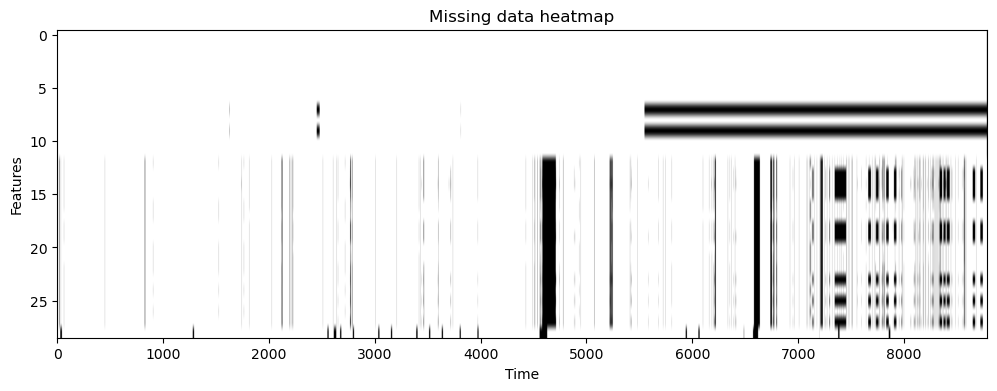

In [37]:
plt.figure(figsize=(12, 4))
plt.imshow(alldata_hourly.isna().T, aspect='auto', cmap='gray_r')
plt.xlabel('Time')
plt.ylabel('Features')
plt.title('Missing data heatmap')
plt.show()

In [40]:
results = []
for col in alldata_hourly.columns:
        missing_count = alldata_hourly[col].isna().sum()
        missing_percent = alldata_hourly[col].isna().mean() * 100
        missing_times = alldata_hourly.index[alldata_hourly[col].isna()].tolist()
        
        results.append({
            'feature': col,
            'missing_count': missing_count,
            'missing_percent': missing_percent,
            'missing_times': missing_times
        })

In [41]:
print(results)

[{'feature': 'mFRRDownActBal | mFRRDownActBal | 804724', 'missing_count': np.int64(1), 'missing_percent': np.float64(0.011384335154826957), 'missing_times': [Timestamp('2024-12-31 23:00:00')]}, {'feature': 'mFRRUpActSpec | mFRRUpActSpec | 804713', 'missing_count': np.int64(1), 'missing_percent': np.float64(0.011384335154826957), 'missing_times': [Timestamp('2024-12-31 23:00:00')]}, {'feature': 'mFRRDownActSpec | mFRRDownActSpec | 804714', 'missing_count': np.int64(1), 'missing_percent': np.float64(0.011384335154826957), 'missing_times': [Timestamp('2024-12-31 23:00:00')]}, {'feature': 'ImbalanceMWh | ImbalanceMWh | 804715', 'missing_count': np.int64(1), 'missing_percent': np.float64(0.011384335154826957), 'missing_times': [Timestamp('2024-12-31 23:00:00')]}, {'feature': 'ImbalancePriceEUR | ImbalancePriceEUR | 804716', 'missing_count': np.int64(1), 'missing_percent': np.float64(0.011384335154826957), 'missing_times': [Timestamp('2024-12-31 23:00:00')]}, {'feature': 'ImbalancePriceDKK |

In [42]:
#1. Übersicht über fehlende Daten
# Übersicht: Anzahl und Prozent fehlender Werte
missing_summary = pd.DataFrame({
    'missing_count': alldata_hourly.isna().sum(),
    'missing_percent': alldata_hourly.isna().mean() * 100
}).sort_values('missing_percent', ascending=False)

print(missing_summary)

                                                    missing_count  \
BalancingPowerPriceUpDKK | BalancingPowerPriceU...           3266   
BalancingPowerPriceDownDKK | BalancingPowerPric...           3266   
Observed mean intensity of global radiation in ...            847   
Observed accumulated precipitation the past hou...            842   
Observed mean wind speed the past hour at Hamme...            834   
Observed mean wind direction the past hour at H...            829   
Observed minimum temperature past hour at Hamme...            822   
Observed maximum temperature past hour at Hamme...            812   
Observed mean humidity past hour at Hammer Odde...            807   
Observed mean temperature past hour at Hammer O...            798   
Observed mean intensity of global radiation in ...            469   
Observed accumulated precipitation the past hou...            459   
Observed mean wind speed the past hour at Nex -...            452   
Observed mean wind direction the p

In [ ]:
#Perioden mit großen Lücken ausschließen

#Definiere zuerst, was eine "große Lücke" ist. Zum Beispiel, wenn mehr als 20% eines Features in einem bestimmten Zeitraum fehlen:
threshold_percent = 20  # z.B. 20% fehlend
features_to_exclude = missing_summary[missing_summary['missing_percent'] > threshold_percent].index

# DataFrame ohne Features mit großen Lücken
df_filtered = df.drop(columns=features_to_exclude)